Import Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load Dataset

In [31]:
df = pd.read_csv("student_data.csv")


Basic Exploration

In [32]:
print(df.shape)
df.info()
df.describe()


(100, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   student_id       100 non-null    int64 
 1   attendance       100 non-null    int64 
 2   study_hours      100 non-null    int64 
 3   internal_marks   100 non-null    int64 
 4   previous_result  100 non-null    object
 5   final_result     100 non-null    object
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


,student_id,attendance,study_hours,internal_marks
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,71.180000,2.810000,66.460000
std,29.011492,14.399341,1.236605,16.655402
min,1.000000,45.000000,1.000000,38.000000
25%,25.750000,57.750000,2.000000,50.000000
50%,50.500000,72.500000,3.000000,68.000000
75%,75.250000,84.000000,4.000000,80.000000
max,100.000000,95.000000,5.000000,94.000000


Encode Categorical Data

In [33]:
df['previous_result'] = df['previous_result'].map({'Pass': 1, 'Fail': 0})
df['final_result'] = df['final_result'].map({'Pass': 1, 'Fail': 0})


Data Visualization

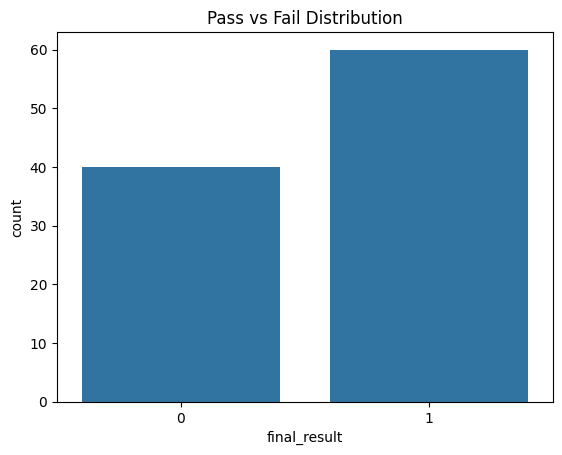

In [34]:
sns.countplot(x='final_result', data=df)
plt.title("Pass vs Fail Distribution")
plt.show()


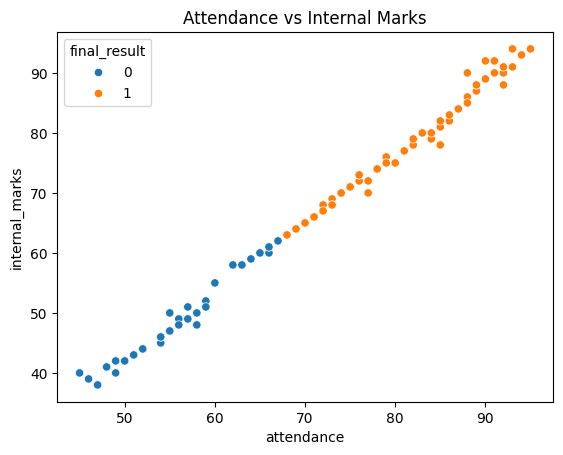

In [35]:
sns.scatterplot(
    x='attendance',
    y='internal_marks',
    hue='final_result',
    data=df
)
plt.title("Attendance vs Internal Marks")
plt.show()


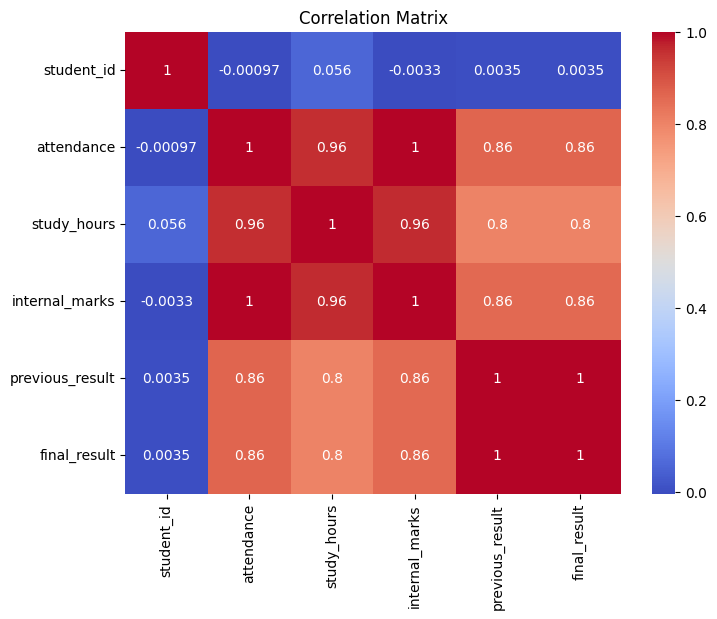

In [36]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


Feature Selection

In [37]:
X = df[['attendance', 'study_hours', 'internal_marks', 'previous_result']]
y = df['final_result']


Train-Test Split

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Model Training

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print("Model training completed successfully.")



Model training completed successfully.


Prediction & Accuracy

In [40]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



Test on New Student

In [41]:
import pandas as pd

new_student = pd.DataFrame(
    [[78, 3, 72, 1]],
    columns=['attendance', 'study_hours', 'internal_marks', 'previous_result']
)

prediction = model.predict(new_student)

if prediction[0] == 1:
    print("Student is likely to PASS")
else:
    print("Student is likely to FAIL")


Student is likely to PASS
